# Depression Detector

Approach taken to train a machine learning model to categorize a person according to their depression level respectively.


```
1.import dataset

2.build linear model

3.train model

4.Evaluate model effectiveness

5.Use trained model to make predictions
```



In [ ]:
# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [ ]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset (1) (1).xlsx to dataset (1) (1).xlsx


In [ ]:
#preview the data
df = pd.read_excel('dataset (1) (1).xlsx').iloc[:,3:13]
df.head()

,SEX,AGE,MENTAL DISORDER HISTORY,SUIC ATTEMPT HISTORY,LIVING WITH SOMEBODY,ECONOMIC INCOME,DEPRESSION,SUIC RISK,ANXIETY STATE,ANXIETY TRAIT
0,man,30,no,ideation,no,yes,21,37,54,40
1,woman,30,no,ideation,yes,yes,26,46,34,36
2,man,39,yes,no,no,yes,8,21,33,29
3,woman,36,no,no,yes,no,27,70,42,48
4,man,49,yes,no,yes,yes,1,28,11,17


In [ ]:
#preprocess the data
#change the mental disorder history category to integers. 0 representing no 1 representing yes
MDH = df['MENTAL DISORDER HISTORY'].isin(['yes'])
MDH1 = df['MENTAL DISORDER HISTORY'].isin(['no'])
df.loc[MDH, 'MENTAL DISORDER HISTORY'] = 1
df.loc[MDH1,'MENTAL DISORDER HISTORY'] = 0


#change the living with somebody category to integers. 0 representing no 1 representing yes
LIVING = df['LIVING WITH SOMEBODY'].isin(["yes"])
df.loc[LIVING, 'LIVING WITH SOMEBODY'] = 1
df.loc[~LIVING,'LIVING WITH SOMEBODY'] = 0

#change the ECONOMIC INCOME to integers. 0 representing no 1 representing yes
INCOME = df['ECONOMIC INCOME'].isin(["yes"])
df.loc[INCOME, 'ECONOMIC INCOME'] = 1
df.loc[~INCOME,'ECONOMIC INCOME'] = 0


#change the sex to integers. 0 representing boys 1 representing girls
GENDER = df['SEX'].isin(['woman'])
df.loc[GENDER, 'SEX'] = 1
df.loc[~GENDER,'SEX'] = 0

#change the sex to integers. 0 representing boys 1 representing girls
condition1= df['SUIC ATTEMPT HISTORY'].isin(['ideation'])
condition2= df['SUIC ATTEMPT HISTORY'].isin(['yes'])
condition3= df['SUIC ATTEMPT HISTORY'].isin(['no'])
df.loc[condition1, 'SUIC ATTEMPT HISTORY'] = 1
df.loc[condition2,'SUIC ATTEMPT HISTORY'] = 2
df.loc[condition3,'SUIC ATTEMPT HISTORY'] = 0

#categorize depression levels
no_depression = df['DEPRESSION'] <=15
mild_depression = df['DEPRESSION'].between(16, 30, inclusive=True)
moderate_depression = df['DEPRESSION'].between(31, 45, inclusive=True) 
severe_depression = df['DEPRESSION'].between(46, 60, inclusive=True)
df.loc[no_depression, 'DEPRESSION'] = 0
df.loc[mild_depression, 'DEPRESSION'] = 1
df.loc[moderate_depression, 'DEPRESSION'] = 2 
df.loc[severe_depression, 'DEPRESSION'] = 3

# Drop un-used features.
#df = df.drop(columns=['SUB PERIODS', 'PROVINCE'] , axis = 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


In [ ]:
#convert the object dtypes to numerical dtypes

df["MENTAL DISORDER HISTORY"] = pd.to_numeric(df["MENTAL DISORDER HISTORY"])
df["SEX"] = pd.to_numeric(df["SEX"])
df["SUIC ATTEMPT HISTORY"] = pd.to_numeric(df["SUIC ATTEMPT HISTORY"])
df["LIVING WITH SOMEBODY"] = pd.to_numeric(df["LIVING WITH SOMEBODY"])
df["ECONOMIC INCOME"] = pd.to_numeric(df["ECONOMIC INCOME"])
print(df.dtypes)

SEX                        int64
AGE                        int64
MENTAL DISORDER HISTORY    int64
SUIC ATTEMPT HISTORY       int64
LIVING WITH SOMEBODY       int64
ECONOMIC INCOME            int64
DEPRESSION                 int64
SUIC RISK                  int64
ANXIETY STATE              int64
ANXIETY TRAIT              int64
dtype: object


In [ ]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(df, test_size=0.2)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(880, 10)
(220, 10)


In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(110, 10)
(110, 10)


In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (880, 10)
 Test dataset       : (110, 10)
 Validation dataset : (110, 10)


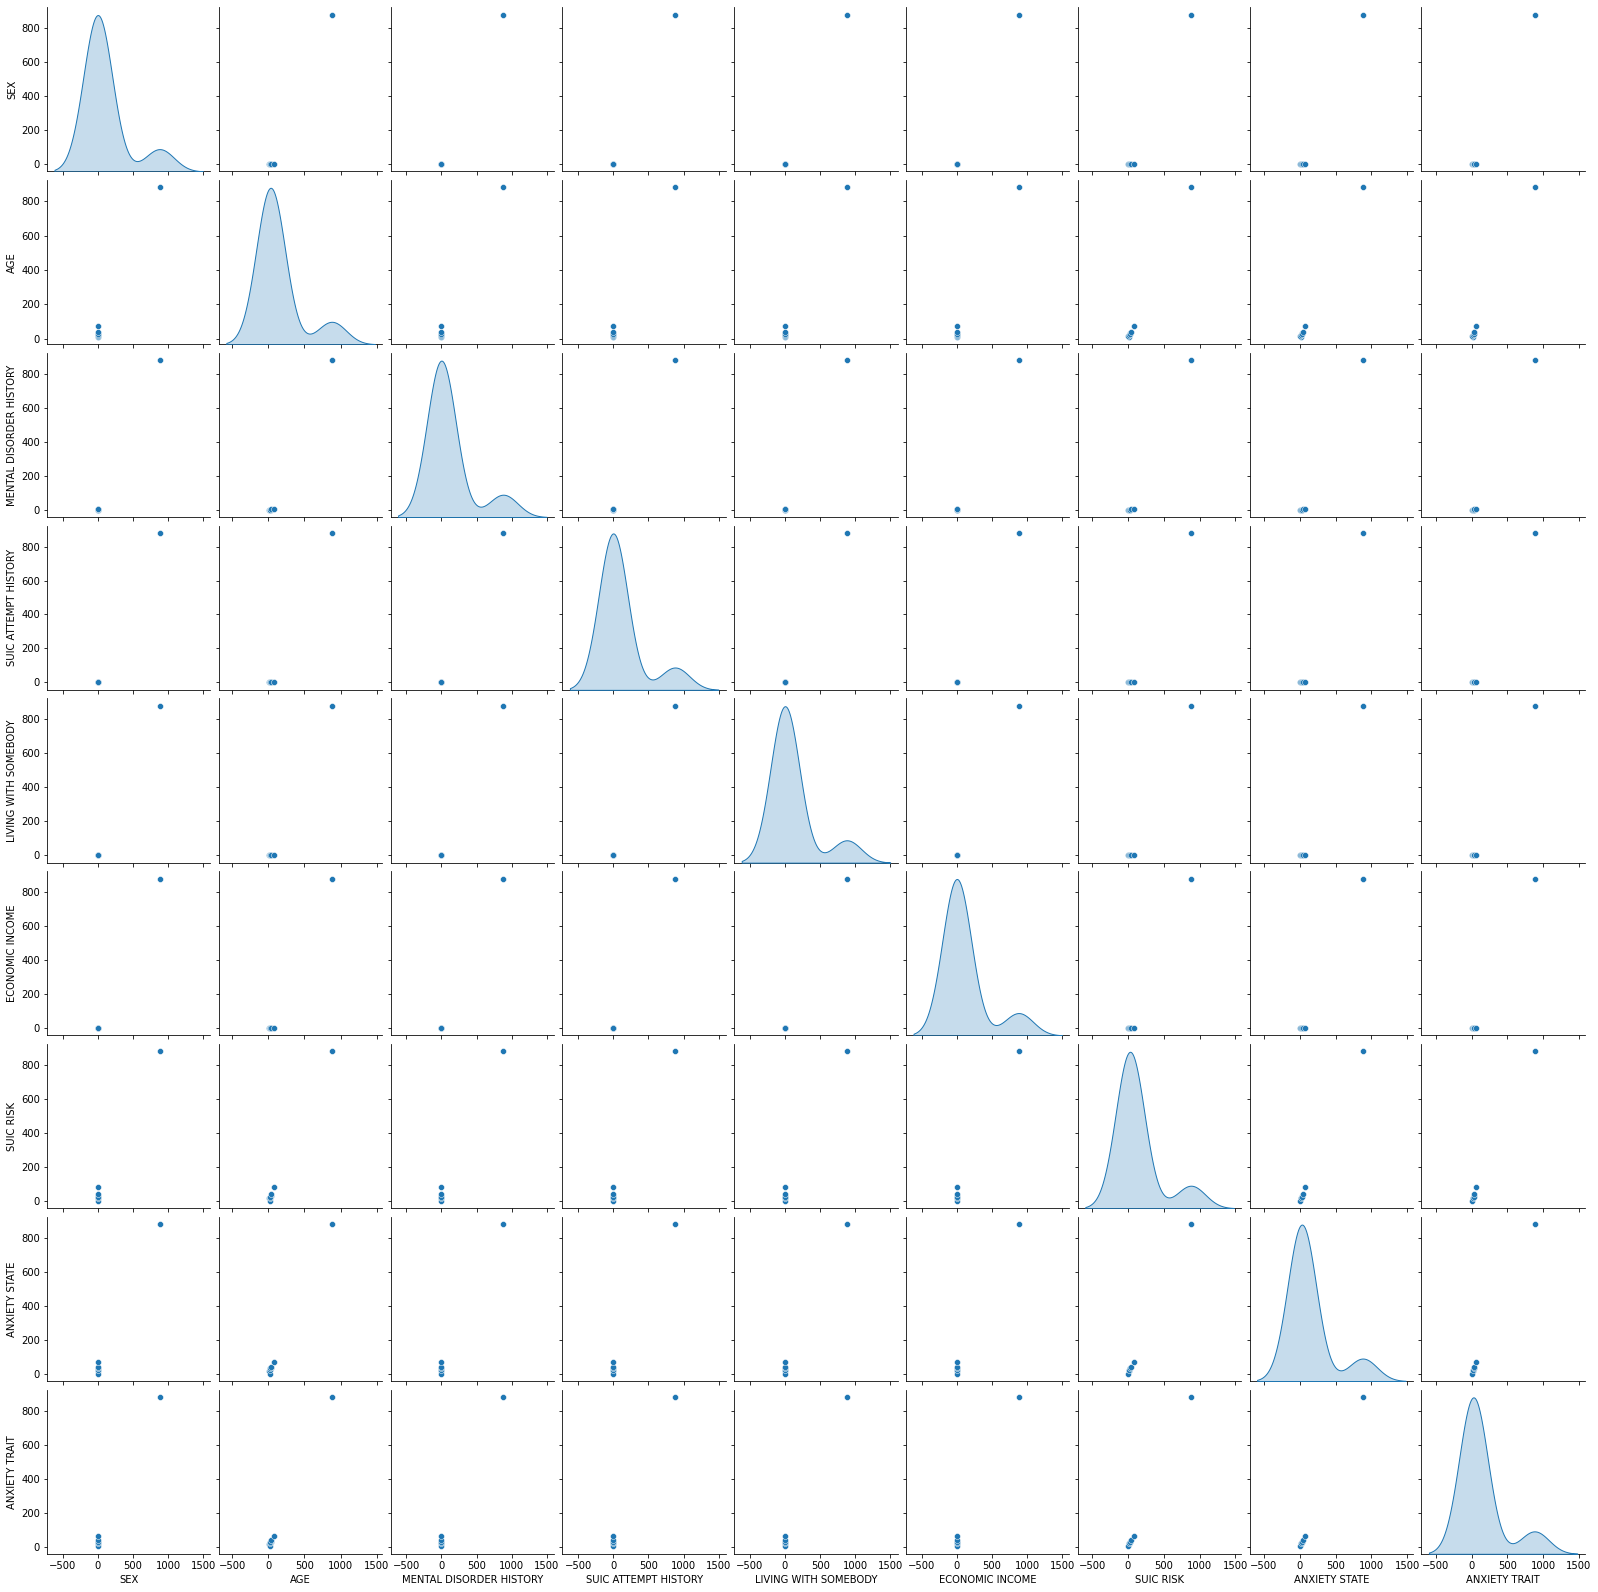

In [ ]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("DEPRESSION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [ ]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("DEPRESSION")
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
SEX,880.0,0.807955,0.394133,0.0,1.0,1.0,1.00,1.0
AGE,880.0,31.378409,11.648775,17.0,23.0,28.0,37.00,76.0
MENTAL DISORDER HISTORY,880.0,0.273864,0.446193,0.0,0.0,0.0,1.00,1.0
SUIC ATTEMPT HISTORY,880.0,0.406818,0.613054,0.0,0.0,0.0,1.00,2.0
LIVING WITH SOMEBODY,880.0,0.848864,0.358385,0.0,1.0,1.0,1.00,1.0
ECONOMIC INCOME,880.0,0.837500,0.369119,0.0,1.0,1.0,1.00,1.0
SUIC RISK,880.0,30.307955,16.007022,2.0,18.0,27.0,39.25,80.0
ANXIETY STATE,880.0,31.888636,14.461163,1.0,21.0,31.0,42.25,66.0
ANXIETY TRAIT,880.0,26.962500,12.129176,1.0,18.0,26.0,36.00,59.0


In [ ]:
train_labels1 = train_dataset.pop('DEPRESSION')
test_labels1 = test_dataset.pop('DEPRESSION')
valid_labels1 = valid_dataset.pop('DEPRESSION')

In [ ]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3
452,0,1,0,0
489,0,1,0,0
592,1,0,0,0
505,1,0,0,0
889,1,0,0,0
...,...,...,...,...
948,0,0,1,0
763,0,1,0,0
550,1,0,0,0
877,1,0,0,0


# Data Normalization/Scaling
Subtract the mean of the training data and divide by the standard deviation of the training data.

In [ ]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

normed_train_data.head(10)

,SEX,AGE,MENTAL DISORDER HISTORY,SUIC ATTEMPT HISTORY,LIVING WITH SOMEBODY,ECONOMIC INCOME,SUIC RISK,ANXIETY STATE,ANXIETY TRAIT
452,-2.049956,-0.547561,1.627403,-0.663593,0.421715,-2.268918,0.667960,-0.476354,1.404671
489,0.487261,0.740129,-0.613778,-0.663593,0.421715,0.440238,-0.019239,0.422605,0.662658
592,0.487261,-0.461715,-0.613778,-0.663593,0.421715,-2.268918,0.043234,-0.752957,-0.079354
505,0.487261,0.568437,-0.613778,-0.663593,0.421715,0.440238,-1.268690,-0.545505,-0.574029
889,0.487261,-0.032485,1.627403,-0.663593,0.421715,0.440238,-1.081273,-0.960409,0.003092
260,0.487261,-0.719252,-0.613778,0.967585,0.421715,0.440238,-0.581492,-1.237012,-0.409137
632,0.487261,-1.148482,-0.613778,-0.663593,0.421715,0.440238,-0.456547,-0.199751,0.003092
413,0.487261,-0.633406,1.627403,0.967585,0.421715,0.440238,-0.019239,-1.029560,-0.738921
98,0.487261,0.654283,-0.613778,-0.663593,0.421715,0.440238,-0.019239,-0.476354,-0.574029
625,0.487261,-1.062636,-0.613778,0.967585,-2.368577,0.440238,2.042357,0.630057,0.992442


In [ ]:


# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(9, input_shape = (normed_train_data.shape[1],))) # Input layer => input_shape must be explicitly designated
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(4, activation='softmax'))# Output layer => output dimension = 3 since it is a multiclass problem
     # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0008
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


EPOCHS = 107
batch_size = 16 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )


Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 16)                160       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,134
Tr

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
102,0.571415,0.740909,0.493618,0.809091,102
103,0.571928,0.735227,0.497381,0.809091,103
104,0.569489,0.739773,0.493001,0.772727,104
105,0.571332,0.734091,0.496344,0.809091,105
106,0.570503,0.742045,0.496163,0.800000,106


In [ ]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[8.49230587e-01, 1.48587167e-01, 2.05986598e-03, 1.22398051e-04],
       [8.59078586e-01, 1.38932109e-01, 1.87603955e-03, 1.13316644e-04],
       [8.62694383e-01, 1.35386139e-01, 1.80972542e-03, 1.09787637e-04],
       [5.62162936e-01, 4.26034302e-01, 1.12720709e-02, 5.30683319e-04],
       [1.37803126e-02, 2.12785393e-01, 6.11424088e-01, 1.62010193e-01],
       [9.49161649e-01, 5.02971038e-02, 5.01785951e-04, 3.95099269e-05],
       [4.91564758e-02, 4.61268514e-01, 4.31592792e-01, 5.79822473e-02],
       [8.31950188e-01, 1.65518090e-01, 2.39341171e-03, 1.38282456e-04],
       [7.52317488e-01, 2.43249357e-01, 4.21322603e-03, 2.19897833e-04],
       [9.16004181e-01, 8.29838589e-02, 9.46328044e-04, 6.56520497e-05]],
      dtype=float32)

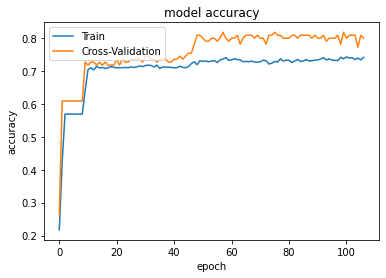

In [ ]:
#see how training went

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

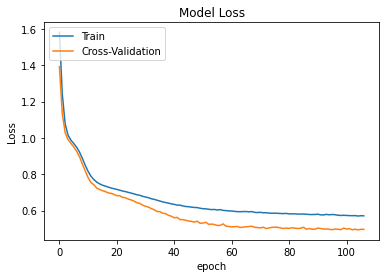

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
28/28 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7398
Accuracy   :  0.74 


In [ ]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
4/4 - 0s - loss: 0.5188 - accuracy: 0.7636 - 20ms/epoch - 5ms/step
Accuracy   :  0.76


In [ ]:
print('Cross Validation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Cross Validation Split: 
4/4 - 0s - loss: 0.4962 - accuracy: 0.8000 - 20ms/epoch - 5ms/step
Accuracy   :  0.80


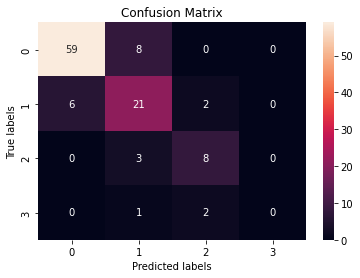

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_valid_dataset)

# predict_results = (predict_results.argmax())
predict_results= predict_results.argmax(axis = 1)

cm = confusion_matrix(valid_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);